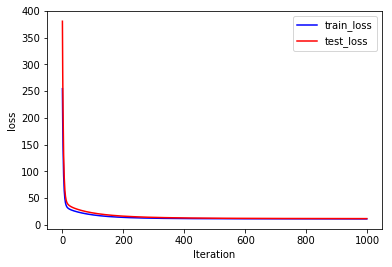

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import datasets
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix, hstack   
    
#获取文件数据    
def get_data(file):
    inputs,labels = datasets.load_svmlight_file(file)  #读取文件
    one = np.ones((inputs.shape[0],1))
    inputs = hstack( [inputs, csr_matrix(one)] ).toarray() 
    labels = np.array(labels).reshape(inputs.shape[0],1)
    return inputs, labels

#训练
def train( X, Y, learning_rate=0.001, epoch=1000):
    w = np.ones((X.shape[1], 1))
    list = []        #定义一个空列表
    for i in range(epoch):
        w -= learning_rate * np.dot(X.transpose(), X.dot(w) - Y )
        Y_prediction = X.dot(w)
        loss = 0.5/X.shape[0]* np.dot((Y - Y_prediction).transpose(), (Y - Y_prediction) ).sum()
        list.append(loss)        
    #print(list)   
    return w,list

#测试
def test( X_test, Y_test, w):
    Y_prediction = X_test.dot(w)
    loss = 0.5/X_test.shape[0] * np.dot((Y_test - Y_prediction).transpose(), (Y_test - Y_prediction) ).sum()
    return loss

#迭代测试loss
def test_loss_list( X_test, Y_test, X_train, Y_train,learning_rate, epoch):
    loss_list = []
    for i in range(epoch):
        w,train_list = train(X_train, Y_train,learning_rate, i)
        loss = test(X_test, Y_test, w)
        loss_list.append(loss)
    return loss_list

#画图
def plot_loss(train_loss,test_loss):   
    plt.xlabel('Iteration')
    plt.ylabel('loss')
    plt.plot(train_loss, label="train_loss",color="blue")
    plt.plot(test_loss, label="test_loss",color="red")
    plt.legend(loc='upper right')
    plt.show()

if __name__ =="__main__":
    learning_rate = 0.0001
    epoch= 1000
    x,y = get_data('housing_scale')
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
    w,train_loss = train(x_train, y_train,learning_rate, epoch)
    test_loss = test_loss_list( x_test, y_test,x_train, y_train, learning_rate,epoch)
     #print (test_loss)
    plot_loss(train_loss,test_loss)
   